In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import bisect

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
indexData = pd.read_csv('../data/indexData_gov2unsorted_uint16.txt', sep='\t', header=None)

In [3]:
header = ['Term', 'Li_Len', '1s_Qnt', '1rl_Avg', 'Liwo1_Len', 'C_Li_Len', 'C_Liwo1_Len', 'Bitmap_Bytes',
          'Bitmap_BytesOnDisk', 'EWAH_bitmap_Bytes', 'EWAH_bitmap_BytesOnDisk', 'Bitmap_1s']
indexData.columns = header

In [4]:
#indexData['Bitmap_Bytes'] = indexData.Li_Len / 8 + 1
indexData['Li_Bytes'] = indexData.Li_Len * 4
indexData['Liwo1_Bytes'] = indexData.Liwo1_Len * 4
indexData['C_Li_Bytes'] = indexData.C_Li_Len * 4
indexData['C_Liwo1_Bytes'] = indexData.C_Liwo1_Len * 4
indexData['Ones_Ratio'] = indexData['1s_Qnt'] / indexData.Li_Len

# SS_Ratio (Space Saving): 1 - (CompressedSize / UncompressedSize) #
indexData['SS_Ratio_Li'] = 1 - (indexData.C_Li_Bytes / indexData.Li_Bytes)
indexData['SS_Ratio_Liwo1'] = 1 - (indexData.C_Liwo1_Bytes / indexData.Liwo1_Bytes)

indexData['SS_Ratio_Hybrid_Un'] = 1 - (indexData.Liwo1_Bytes + indexData.Bitmap_Bytes) / indexData.Li_Bytes
indexData['SS_Ratio_Hybrid_Co'] = 1 - (indexData.C_Liwo1_Bytes + indexData.EWAH_bitmap_Bytes) / indexData.Li_Bytes

indexData['SS_Ratio_Hybrid_Un_woBitmap'] = 1 - (indexData.Liwo1_Bytes) / indexData.Li_Bytes
indexData['SS_Ratio_Hybrid_Co_woBitmap'] = 1 - (indexData.C_Liwo1_Bytes) / indexData.Li_Bytes

indexData['C_Li_wo1_EWAH_bitmap_Bytes'] = indexData.C_Liwo1_Bytes + indexData.EWAH_bitmap_Bytes


In [5]:
indexData[indexData.columns[1:]]
#indexData[['SS_Ratio_Li', 'SS_Ratio_Liwo1', 'SS_Ratio_Hybrid_Un', 'SS_Ratio_Hybrid_Co']]

,Li_Len,1s_Qnt,1rl_Avg,Liwo1_Len,C_Li_Len,C_Liwo1_Len,Bitmap_Bytes,Bitmap_BytesOnDisk,EWAH_bitmap_Bytes,EWAH_bitmap_BytesOnDisk,...,C_Li_Bytes,C_Liwo1_Bytes,Ones_Ratio,SS_Ratio_Li,SS_Ratio_Liwo1,SS_Ratio_Hybrid_Un,SS_Ratio_Hybrid_Co,SS_Ratio_Hybrid_Un_woBitmap,SS_Ratio_Hybrid_Co_woBitmap,C_Li_wo1_EWAH_bitmap_Bytes
0,13059642,7036854,2.297,6022788,1243697,625615,879608,879616,3452,3468,...,4974788,2502460,0.539,0.905,0.896,0.522,0.952,0.539,0.952,2505912
1,12060760,6116190,2.107,5944570,1181124,637227,764524,764532,3002,3018,...,4724496,2548908,0.507,0.902,0.893,0.491,0.947,0.507,0.947,2551910
2,11066901,4982433,1.858,6084468,1148920,671243,622806,622814,2446,2462,...,4595680,2684972,0.450,0.896,0.890,0.436,0.939,0.450,0.939,2687418
3,10789754,4837311,1.901,5952443,1116249,667219,604664,604672,2374,2390,...,4464996,2668876,0.448,0.897,0.888,0.434,0.938,0.448,0.938,2671250
4,10286262,4306101,1.752,5980161,1101644,678623,538264,538272,2114,2130,...,4406576,2714492,0.419,0.893,0.887,0.406,0.934,0.419,0.934,2716606
5,10086692,4674474,2.000,5412218,1049013,622429,584310,584318,2294,2310,...,4196052,2489716,0.463,0.896,0.885,0.449,0.938,0.463,0.938,2492010
6,9606809,3838490,1.733,5768319,1048477,681213,479812,479820,1884,1900,...,4193908,2724852,0.400,0.891,0.882,0.387,0.929,0.400,0.929,2726736
7,9440690,3724050,1.705,5716640,1046071,674224,465508,465516,1828,1844,...,4184284,2696896,0.394,0.889,0.882,0.382,0.929,0.394,0.929,2698724
8,9093904,3423348,1.642,5670556,1023906,676743,427920,427928,1682,1698,...,4095624,2706972,0.376,0.887,0.881,0.365,0.926,0.376,0.926,2708654
9,8921736,3369096,1.691,5552640,1005752,675936,421138,421146,1654,1670,...,4023008,2703744,0.378,0.887,0.878,0.366,0.924,0.378,0.924,2705398


In [6]:
# Size of vocabulary: 14813510 (terms) #
# 2134281 / 14813510 = 0.144076657 #
#indexData[indexData.columns[9:]].describe()
indexData.describe()

,Term,Li_Len,1s_Qnt,1rl_Avg,Liwo1_Len,C_Li_Len,C_Liwo1_Len,Bitmap_Bytes,Bitmap_BytesOnDisk,EWAH_bitmap_Bytes,...,C_Li_Bytes,C_Liwo1_Bytes,Ones_Ratio,SS_Ratio_Li,SS_Ratio_Liwo1,SS_Ratio_Hybrid_Un,SS_Ratio_Hybrid_Co,SS_Ratio_Hybrid_Un_woBitmap,SS_Ratio_Hybrid_Co_woBitmap,C_Li_wo1_EWAH_bitmap_Bytes
count,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,...,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000,160429.000
mean,162542.857,35256.147,3026.110,1.017,32230.037,8173.580,7751.981,379.749,387.749,5.390,...,32694.319,31007.926,0.004,0.528,0.527,0.004,0.528,0.004,0.529,31013.316
std,213756.504,244958.857,61522.953,0.188,194850.622,38643.533,33565.248,7690.341,7690.341,30.109,...,154574.131,134260.990,0.013,0.097,0.097,0.012,0.099,0.013,0.098,134279.779
min,0.000,100.000,1.000,1.000,93.000,29.000,29.000,2.000,10.000,2.000,...,116.000,116.000,0.000,0.213,0.194,0.000,0.193,0.000,0.200,120.000
25%,40114.000,869.000,1.000,1.000,867.000,461.000,460.000,2.000,10.000,4.000,...,1844.000,1840.000,0.001,0.469,0.468,0.001,0.468,0.001,0.470,1844.000
50%,88414.000,2210.000,2.000,1.000,2208.000,1075.000,1074.000,2.000,10.000,4.000,...,4300.000,4296.000,0.002,0.523,0.523,0.001,0.523,0.002,0.524,4300.000
75%,184669.000,6934.000,11.000,1.000,6924.000,2916.000,2910.000,2.000,10.000,4.000,...,11664.000,11640.000,0.004,0.584,0.584,0.003,0.585,0.004,0.585,11644.000
max,1107204.000,13059642.000,7036854.000,8.000,6084468.000,1243697.000,681213.000,879608.000,879616.000,3452.000,...,4974788.000,2724852.000,0.539,0.905,0.896,0.522,0.952,0.539,0.952,2726736.000


In [7]:
bins = np.array((.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.), dtype=np.float64)
count_won_SS_Ratio_Hybrid_Co = np.zeros(10, dtype=np.float64)
count_lost_SS_Ratio_Hybrid_Co = np.zeros(10, dtype=np.float64)

#won_SS_SS_Ratio_Hybrid_Co = indexData[indexData['SS_Ratio_Hybrid_Co'] > indexData['SS_Ratio_Hybrid_Co']]['SS_Ratio_Hybrid_Co']
won_SS_Ratio_Hybrid_Co = np.array(indexData.query('SS_Ratio_Hybrid_Co > SS_Ratio_Li')['SS_Ratio_Hybrid_Co'])
lost_SS_Ratio_Hybrid_Co = np.array(indexData.query('SS_Ratio_Hybrid_Co <= SS_Ratio_Li')['SS_Ratio_Hybrid_Co'])

# Interval Type [) #
for SS_Ratio_Hybrid_Co in won_SS_Ratio_Hybrid_Co:
    count_won_SS_Ratio_Hybrid_Co[bisect.bisect_right(bins, SS_Ratio_Hybrid_Co)] += 1
for SS_Ratio_Hybrid_Co in lost_SS_Ratio_Hybrid_Co:
    # First interval includes NEGATIVE values #
    count_lost_SS_Ratio_Hybrid_Co[bisect.bisect_right(bins, SS_Ratio_Hybrid_Co)] += 1
    
# Slower! #
#for index, row in indexData.iterrows():
#    if (row.SS_Ratio_Hybrid_Co > row.SS_Ratio_Li):
#        count_won_SS_SS_Ratio_Hybrid_Co[bisect.bisect_right(bins, row.SS_Ratio_Hybrid_Co)] += 1
#    else: # row.SS_Ratio_Hybrid_Co <= row.SS_Ratio_Li] #
#        count_lost_SS_SS_Ratio_Hybrid_Co[bisect.bisect_right(bins, row.SS_Ratio_Hybrid_Co)] += 1

count_won_SS_Ratio_Hybrid_Co = (count_won_SS_Ratio_Hybrid_Co / indexData.shape[0]) * 100
count_lost_SS_Ratio_Hybrid_Co = (count_lost_SS_Ratio_Hybrid_Co / indexData.shape[0]) * 100

print 'Bin\t\tWon\t\tLost'
previousBin = 0.0
totalWon = 0.0
totalLost = 0.0
for won, lost, bi in zip(count_won_SS_Ratio_Hybrid_Co, count_lost_SS_Ratio_Hybrid_Co, bins):
    print '[%.1f, %.1f)\t%.2f\t\t%.2f' %(previousBin, bi, won, lost)
    previousBin = bi
    totalWon += won
    totalLost += lost
print 'Total\t\t%.2f\t\t%.2f' %(totalWon, totalLost)


Bin		Won		Lost
[0.0, 0.1)	0.00		0.00
[0.1, 0.2)	0.00		0.00
[0.2, 0.3)	0.01		0.74
[0.3, 0.4)	0.32		8.07
[0.4, 0.5)	3.58		25.04
[0.5, 0.6)	17.43		24.26
[0.6, 0.7)	13.48		1.79
[0.7, 0.8)	4.50		0.00
[0.8, 0.9)	0.74		0.00
[0.9, 1.0)	0.03		0.00
Total		40.10		59.90


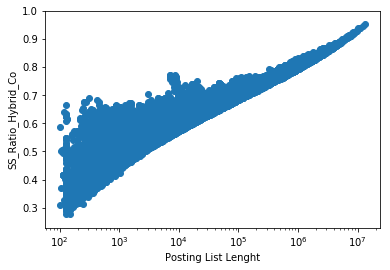

In [8]:
# SS_Ratio_Li / SS_Ratio_Hybrid_Co #

won_SS_Ratio_Hybrid_Co_dataFrame = indexData.query('SS_Ratio_Hybrid_Co > SS_Ratio_Li')[['Li_Len','SS_Ratio_Hybrid_Co']]
figure, ax = plt.subplots()
ax.scatter(won_SS_Ratio_Hybrid_Co_dataFrame.Li_Len, won_SS_Ratio_Hybrid_Co_dataFrame.SS_Ratio_Hybrid_Co)

ax.set_xlabel('Posting List Lenght')
ax.set_ylabel('SS_Ratio_Hybrid_Co')
ax.set_xscale('log')
#ax.set_yscale('log')

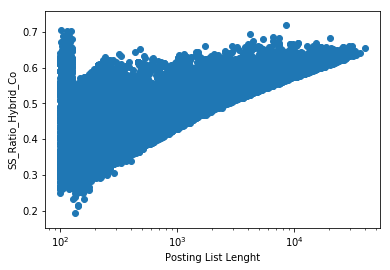

In [11]:
# SS_Ratio_Li / SS_Ratio_Hybrid_Co #

lost_SS_Ratio_Hybrid_Co_dataFrame = indexData.query('SS_Ratio_Hybrid_Co <= SS_Ratio_Li')[['Li_Len','SS_Ratio_Hybrid_Co']]
figure, ax = plt.subplots()
ax.scatter(lost_SS_Ratio_Hybrid_Co_dataFrame.Li_Len, lost_SS_Ratio_Hybrid_Co_dataFrame.SS_Ratio_Hybrid_Co)

ax.set_xlabel('Posting List Lenght')
ax.set_ylabel('SS_Ratio_Hybrid_Co')
ax.set_xscale('log')
#ax.set_yscale('log')

In [12]:
won_Hybrid_Co = indexData.query('SS_Ratio_Hybrid_Co > SS_Ratio_Li')
lost_Hybrid_Co = indexData.query('SS_Ratio_Hybrid_Co <= SS_Ratio_Li')

print 'Posting List Lenght (Li_Bytes)'
print '\tAverage\t\tStd\t\tMin\t\tMax'
print 'Won\t%.2f\t%.2f\t%i\t\t%i' %(won_Hybrid_Co.Li_Bytes.mean(), won_Hybrid_Co.Li_Bytes.std(),
                                    won_Hybrid_Co.Li_Bytes.min(), won_Hybrid_Co.Li_Bytes.max())
print 'Lost\t%.2f\t\t%.2f\t\t%i\t\t%i' %(lost_Hybrid_Co.Li_Bytes.mean(), lost_Hybrid_Co.Li_Bytes.std(),
                                         lost_Hybrid_Co.Li_Bytes.min(), lost_Hybrid_Co.Li_Bytes.max())

print ''
print 'Average 1\'s run Lenght (1rl_Avg)'
print '\tAverage\t\tStd\t\tMin\t\tMax'
print 'Won\t%.2f\t\t%.2f\t\t%.4f\t\t%.4f' %(won_Hybrid_Co['1rl_Avg'].mean(), won_Hybrid_Co['1rl_Avg'].std(),
                                            won_Hybrid_Co['1rl_Avg'].min(), won_Hybrid_Co['1rl_Avg'].max())
print 'Lost\t%.2f\t\t%.2f\t\t%.4f\t\t%.4f' %(lost_Hybrid_Co['1rl_Avg'].mean(), lost_Hybrid_Co['1rl_Avg'].std(),
                                             lost_Hybrid_Co['1rl_Avg'].min(), lost_Hybrid_Co['1rl_Avg'].max())

print ''
print '1\'s Ratio (Ones_Ratio)'
print '\tAverage\t\tStd\t\tMin\t\tMax'
print 'Won\t%.2f\t\t%.2f\t\t%.4f\t\t%.4f' %(won_Hybrid_Co['Ones_Ratio'].mean(), won_Hybrid_Co['Ones_Ratio'].std(),
                                            won_Hybrid_Co['Ones_Ratio'].min(), won_Hybrid_Co['Ones_Ratio'].max())
print 'Lost\t%.2f\t\t%.2f\t\t%.4f\t\t%.4f' %(lost_Hybrid_Co['Ones_Ratio'].mean(), lost_Hybrid_Co['Ones_Ratio'].std(),
                                             lost_Hybrid_Co['Ones_Ratio'].min(), lost_Hybrid_Co['Ones_Ratio'].max())

Posting List Lenght (Li_Bytes)
	Average		Std		Min		Max
Won	338781.34	1526026.61	408		52238568
Lost	8636.61		11126.38		400		159932

Average 1's run Lenght (1rl_Avg)
	Average		Std		Min		Max
Won	1.03		0.26		1.0000		8.0000
Lost	1.01		0.12		1.0000		7.0000

1's Ratio (Ones_Ratio)
	Average		Std		Min		Max
Won	0.01		0.02		0.0001		0.5388
Lost	0.00		0.00		0.0001		0.0764


In [13]:
count_won_SS_Ratio_Hybrid_Un = np.zeros(10, dtype=np.float64)
#count_lost_SS_Ratio_Hybrid_Un = np.zeros(10, dtype=np.float64)

won_SS_Ratio_Hybrid_Un = np.array(indexData.query('SS_Ratio_Hybrid_Un > 0')['SS_Ratio_Hybrid_Un'])
#lost_SS_SS_Ratio_Hybrid_Un = np.array(indexData.query('SS_Ratio_Hybrid_Un <= 0')['SS_Ratio_Hybrid_Un'])

# Interval Type [) #
for SS_Ratio_Hybrid_Un in won_SS_Ratio_Hybrid_Un:
    count_won_SS_Ratio_Hybrid_Un[bisect.bisect_right(bins, SS_Ratio_Hybrid_Un)] += 1
#for SS_Ratio_Hybrid_Co in lost_SS_SS_Ratio_Hybrid_Un:
#    count_lost_SS_SS_Ratio_Hybrid_Co[bisect.bisect_right(bins, SS_Ratio_Hybrid_Co)] += 1

count_won_SS_Ratio_Hybrid_Un = (count_won_SS_Ratio_Hybrid_Un / indexData.shape[0]) * 100
#count_lost_SS_SS_Ratio_Hybrid_Co = (count_lost_SS_SS_Ratio_Hybrid_Co / indexData.shape[0]) * 100

print 'Bin\t\tWon'
previousBin = 0.0
totalWon = 0.0
for won, bi in zip(count_won_SS_Ratio_Hybrid_Un, bins):
    print '[%.1f, %.1f)\t%.2f' %(previousBin, bi, won)
    previousBin = bi
    totalWon += won
print 'Total\t\t%.2f' %(totalWon)



Bin		Won
[0.0, 0.1)	99.72
[0.1, 0.2)	0.22
[0.2, 0.3)	0.04
[0.3, 0.4)	0.02
[0.4, 0.5)	0.00
[0.5, 0.6)	0.00
[0.6, 0.7)	0.00
[0.7, 0.8)	0.00
[0.8, 0.9)	0.00
[0.9, 1.0)	0.00
Total		100.00


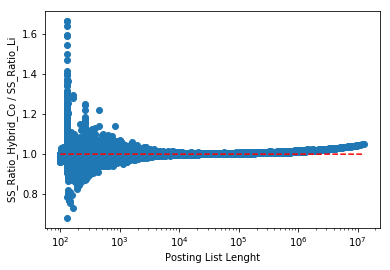

In [14]:
# SS_Ratio_Hybrid_Co / SS_Ratio_Li #

SS_Ratio_Hybrid_Co_over_SS_Ratio_Li = indexData.SS_Ratio_Hybrid_Co / indexData.SS_Ratio_Li

start = indexData.Li_Len.min()
stop = indexData.Li_Len.max()

s = np.arange(start, stop, 10, dtype=np.int64)
threshold = np.full((len(s)), 1.0, dtype=np.float64)

figure, ax = plt.subplots()
ax.plot(s, threshold, color='r', linestyle='--')
ax.scatter(indexData.Li_Len, SS_Ratio_Hybrid_Co_over_SS_Ratio_Li)

ax.set_xlabel('Posting List Lenght')
ax.set_ylabel('SS_Ratio_Hybrid_Co / SS_Ratio_Li')
ax.set_xscale('log')
#ax.set_yscale('log')

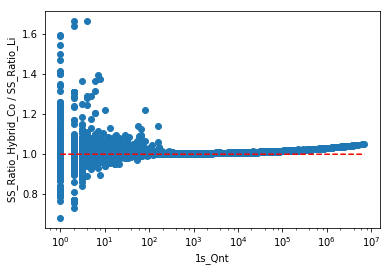

In [15]:
start = indexData['1s_Qnt'].min()
stop = indexData['1s_Qnt'].max()

s = np.arange(start, stop, 10, dtype=np.int64)
threshold = np.full((len(s)), 1.0, dtype=np.float64)

figure, ax = plt.subplots()
ax.plot(s, threshold, color='r', linestyle='--')
ax.scatter(indexData['1s_Qnt'], SS_Ratio_Hybrid_Co_over_SS_Ratio_Li)
ax.set_xlabel('1s_Qnt')
ax.set_ylabel('SS_Ratio_Hybrid_Co / SS_Ratio_Li')
ax.set_xscale('log')

(0.0, 1.1)

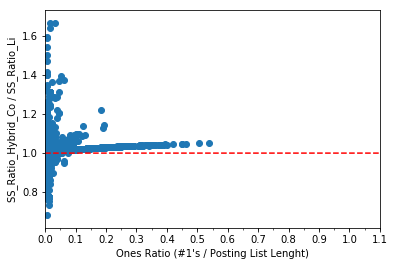

In [16]:
# How many ones do I need to win? #
# X-axis : One's proportion respect to Posting List Length #
# Y-axis : Hybrid Compression Ratio: HybridCompression / PForCompression #

start = 0.0
stop = 1.1

size = indexData.shape[0]

s = np.linspace(start, stop, size, dtype=np.float64)
threshold = np.full((len(s)), 1.0, dtype=np.float64)

figure, ax = plt.subplots()
ax.scatter(indexData.Ones_Ratio, SS_Ratio_Hybrid_Co_over_SS_Ratio_Li)
ax.plot(s, threshold, color='r', linestyle='--')
# Tickers #
min_x = MultipleLocator(0.05)
max_x = MultipleLocator(0.1)
ax.xaxis.set_major_locator(max_x)
ax.xaxis.set_minor_locator(min_x)
ax.set_xlabel('Ones Ratio (#1\'s / Posting List Lenght)')
ax.set_ylabel('SS_Ratio_Hybrid_Co / SS_Ratio_Li')
ax.set_xlim([0.0, 1.1])

In [9]:
# C_Li_Len vs C_Liwo1_Len 
C_Li_Len_vs_C_Liwo1_Len_count_greater = 0
C_Li_Len_vs_C_Liwo1_Len_count_less_equal = 0
assert (indexData.C_Li_Len.shape[0] == indexData.C_Liwo1_Len.shape[0]), "Error de tamaño"
for C_Li_Len, C_Liwo1_Len in zip(indexData.C_Li_Len.values, indexData.C_Liwo1_Len.values):
    if (C_Li_Len > C_Liwo1_Len):
        C_Li_Len_vs_C_Liwo1_Len_count_greater += 1
    else: #(C_Li_Len >= C_Liwo1_Len)
        C_Li_Len_vs_C_Liwo1_Len_count_less_equal += 1
    
print 'C_Li_Len > C_Liwo1_Len: %i out of %i (%.4f)' % (C_Li_Len_vs_C_Liwo1_Len_count_greater, indexData.C_Li_Len.shape[0], float(C_Li_Len_vs_C_Liwo1_Len_count_greater) / indexData.C_Li_Len.shape[0])
print 'C_Li_Len < C_Liwo1_Len: %i out of %i (%.4f)' % (C_Li_Len_vs_C_Liwo1_Len_count_less_equal, indexData.C_Li_Len.shape[0], float(C_Li_Len_vs_C_Liwo1_Len_count_less_equal) / indexData.C_Li_Len.shape[0])

C_Li_Len_vs_C_Liwo1_Len_greater = indexData.query('C_Li_Len > C_Liwo1_Len')['Li_Len']
C_Li_Len_vs_C_Liwo1_Len_less_equal = indexData.query('C_Li_Len <= C_Liwo1_Len')['Li_Len']

C_Li_Len > C_Liwo1_Len: 112124 out of 160429 (0.6989)
C_Li_Len < C_Liwo1_Len: 48305 out of 160429 (0.3011)


In [10]:
# Max Postings List Lenght: 13,059,642 #
# [0,10^3), [10^3,10^4), [10^4,10^5), [10^5,10^6), [10^6,10^7), [10^7,10^8) #
logBins = np.logspace(3.0, 8, num=6, dtype=np.uint64)
bin_count_C_Li_Len_vs_C_Liwo1_Len_greater = np.zeros(6, dtype=np.uint64)
bin_count_C_Li_Len_vs_C_Liwo1_Len_less_equal = np.zeros(6, dtype=np.uint64)
# Interval Type [) #
for Li_Len in C_Li_Len_vs_C_Liwo1_Len_greater.values:
    bin_count_C_Li_Len_vs_C_Liwo1_Len_greater[bisect.bisect_right(logBins, Li_Len)] += 1

for Li_Len in C_Li_Len_vs_C_Liwo1_Len_less_equal.values:
    bin_count_C_Li_Len_vs_C_Liwo1_Len_less_equal[bisect.bisect_right(logBins, Li_Len)] += 1
print bin_count_C_Li_Len_vs_C_Liwo1_Len_greater
print bin_count_C_Li_Len_vs_C_Liwo1_Len_less_equal

[26011 56593 21938  6476  1100     6]
[19083 27077  2145     0     0     0]


[     1000     10000    100000   1000000  10000000 100000000]


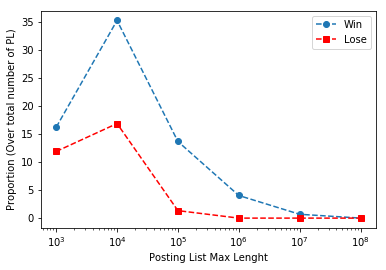

In [11]:
figure, ax = plt.subplots()
y = (bin_count_C_Li_Len_vs_C_Liwo1_Len_greater.astype(dtype=np.float64) / indexData.C_Li_Len.shape[0]) * 100
ax.plot(logBins, y, marker='o', linestyle='--', label='Win')
y = (bin_count_C_Li_Len_vs_C_Liwo1_Len_less_equal.astype(dtype=np.float64) / indexData.C_Li_Len.shape[0]) * 100
ax.plot(logBins, y, color='r', marker='s', linestyle='--', label='Lose')
ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Proportion (Over total number of PL)')
ax.set_xscale('log')
#x.set_yscale('log')
ax.legend()
print logBins


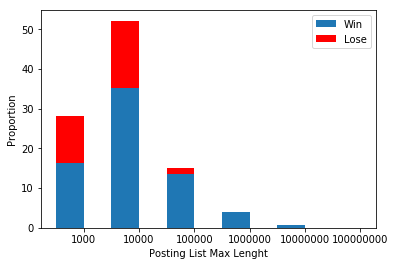

In [12]:
figure, ax = plt.subplots()
x = np.arange(6)

y1 = (bin_count_C_Li_Len_vs_C_Liwo1_Len_greater.astype(dtype=np.float64) / indexData.C_Li_Len.shape[0]) * 100
ax1 = ax.bar(x, y1, 0.50)

y2 = (bin_count_C_Li_Len_vs_C_Liwo1_Len_less_equal.astype(dtype=np.float64) / indexData.C_Li_Len.shape[0]) * 100
ax2 = ax.bar(x, y2, 0.50, bottom=y1, color='r')

plt.xticks(x + 0.5/2., map(lambda x: str(x), logBins))

ax.legend((ax1[0], ax2[0]), ('Win', 'Lose'))
ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Proportion')

[  57.68173149   67.6383411    91.09330233  100.          100.          100.        ]
[ 42.31826851  32.3616589    8.90669767   0.           0.           0.        ]


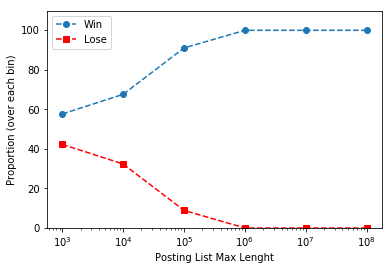

In [13]:
bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_greater = np.zeros(6, dtype=np.float64)
bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_less_equal = np.zeros(6, dtype=np.float64)

for i, (greater, less_equal) in enumerate(zip(bin_count_C_Li_Len_vs_C_Liwo1_Len_greater, bin_count_C_Li_Len_vs_C_Liwo1_Len_less_equal)):
    bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_greater[i] = (np.float64(greater) / (greater + less_equal)) * 100
    bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_less_equal[i] = (np.float64(less_equal) / (greater + less_equal)) * 100

print bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_greater
print bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_less_equal

figure, ax = plt.subplots()
ax.plot(logBins, bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_greater, marker='o', linestyle='--', label='Win')
ax.plot(logBins, bin_absolute_proportion_C_Li_Len_vs_C_Liwo1_Len_less_equal, color='r', marker='s', linestyle='--', label='Lose')
ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Proportion (over each bin)')
ax.set_xscale('log')
ax.set_ylim([0, 110])
#x.set_yscale('log')
ax.legend(loc=2)


In [14]:
# [0,10^3), [10^3,10^4), [10^4,10^5), [10^5,10^6), [10^6,10^7), [10^7,10^8) #
logBins = np.logspace(3.0, 8, num=6, dtype=np.uint64)
C_Li_wo1_EWAH_bitmap_Bytes_win = indexData.query('C_Li_wo1_EWAH_bitmap_Bytes < C_Li_Bytes')
C_Li_wo1_EWAH_bitmap_Bytes_lose = indexData.query('C_Li_wo1_EWAH_bitmap_Bytes >= C_Li_Bytes')

# Tamaño de la 'lista sin unos comprimida' para el enfoque híbrido
# Bins de acuerdo a Longitud de la Lista
bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win = np.zeros(6, dtype=np.uint64)
bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose = np.zeros(6, dtype=np.uint64)

average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win = np.zeros(6, dtype=np.float64)
average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose = np.zeros(6, dtype=np.float64)

average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win = np.zeros(6, dtype=np.float64)
average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose = np.zeros(6, dtype=np.float64)

# Interval Type [) #
for row in C_Li_wo1_EWAH_bitmap_Bytes_win.values:
    Li_Len = row[1] # Longitud de la Lista (# de entradas)
    SS_Ratio_Hybrid_Co = row[20] # Space Saving Ratio
    Ones_Ratio = row[16] # Proporción de Unos
    index = bisect.bisect_right(logBins, Li_Len)
    bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win[index] += 1 
    average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win[index] += SS_Ratio_Hybrid_Co
    average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win[index] += Ones_Ratio

for row in C_Li_wo1_EWAH_bitmap_Bytes_lose.values:
    Li_Len = row[1]
    #SS_Ratio_Li = row[17]
    Ones_Ratio = row[16]
    SS_Ratio_Hybrid_Co = row[20]
    index = bisect.bisect_right(logBins, Li_Len)
    bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[index] += 1
    average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[index] += SS_Ratio_Hybrid_Co
    average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[index] += Ones_Ratio

print (bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win.astype(dtype=np.float64) / indexData.C_Li_Len.shape[0]) * 100
print (bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose.astype(dtype=np.float64) / indexData.C_Li_Len.shape[0]) * 100

[  2.86731202e+00   1.90632616e+01   1.34433301e+01   4.03667666e+00
   6.85661570e-01   3.73997220e-03]
[ 25.24107237  33.09065069   1.56829501   0.           0.           0.        ]


[  10.20091365   36.5519302    89.55279658  100.          100.          100.        ]
[ 89.79908635  63.4480698   10.44720342   0.           0.           0.        ]


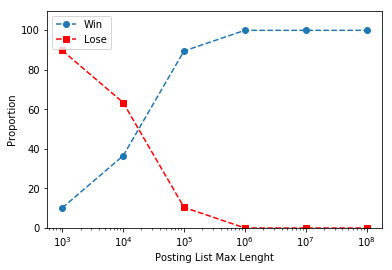

In [15]:
bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_win = np.zeros(6, dtype=np.float64)
bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_lose = np.zeros(6, dtype=np.float64)

for i, (more, less_equal) in enumerate(zip(bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win, bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose)):
    bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_win[i] = (np.float64(more) / (more + less_equal)) * 100
    bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_lose[i] = (np.float64(less_equal) / (more + less_equal)) * 100

print bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_win
print bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_lose

# El eje de las ordenadas representa la proporcion (absoluta) de listas de acuerdo al criterio:
# Si C_Li_wo1_EWAH_bitmap_Bytes < C_Li_Bytes entonces 'win'
# Si C_Li_wo1_EWAH_bitmap_Bytes > C_Li_Bytes entonces 'lose'
figure, ax = plt.subplots()
ax.plot(logBins, bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_win, marker='o', linestyle='--', label='Win')
ax.plot(logBins, bin_absolute_proportion_C_Li_wo1_EWAH_bitmap_Bytes_lose, color='r', marker='s', linestyle='--', label='Lose')
ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Proportion')
ax.set_xscale('log')
ax.set_ylim([0, 110])
#x.set_yscale('log')
ax.legend(loc=2)

In [16]:
print average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose
print bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose

print average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win
print bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win

[ 16937.30675215  27566.99204447   1536.90806939      0.              0.
      0.        ]
[40494 53087  2516     0     0     0]
[  2.16836786e+03   1.68756042e+04   1.38645871e+04   4.82963456e+03
   9.18643775e+02   5.64874094e+00]
[ 4600 30583 21567  6476  1100     6]


In [17]:
average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win = average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win / bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win
average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[:3] = average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[:3] / bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[:3]

Win => C_Li_wo1_EWAH_bitmap_Bytes < C_Li_Bytes
Lose => C_Li_wo1_EWAH_bitmap_Bytes > C_Li_Bytes

Posting List Max Lenght		 SS_Ratio_Hybrid_Co_win		 SS_Ratio_Hybrid_Co_lose
1000 				 0.47 				 0.42
10000 				 0.55 				 0.52
100000 				 0.64 				 0.61
1000000 				 0.75 				 0.00
10000000 				 0.84 				 0.00
100000000 				 0.94 				 0.00


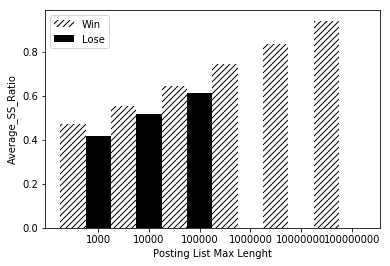

In [18]:
figure, ax = plt.subplots()
x = np.arange(6)

width = 0.5

ax.bar(x, average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win, width, color='w', hatch='////', label='Win')
ax.bar(x + width, average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose, width , color='black', label='Lose')

plt.xticks(x + 0.5, map(lambda x: str(x), logBins))

ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Average_SS_Ratio')
ax.legend(loc=2)

print "Win => C_Li_wo1_EWAH_bitmap_Bytes < C_Li_Bytes"
print "Lose => C_Li_wo1_EWAH_bitmap_Bytes > C_Li_Bytes\n"
print "Posting List Max Lenght\t\t SS_Ratio_Hybrid_Co_win\t\t SS_Ratio_Hybrid_Co_lose"
for i, (win, lose) in enumerate(zip(average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win, average_SS_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose)):
    print "%i \t\t\t\t %.2f \t\t\t\t %.2f" % (logBins[i], win, lose)

In [19]:
print average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose
print bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose

print average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win
print bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win

average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win = average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win / bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win
average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[:3] = average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[:3] / bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose[:3]

[ 161.23971      56.92819836    4.91317303    0.            0.            0.        ]
[40494 53087  2516     0     0     0]
[  44.36044719   68.98374339   91.00287312  163.84566568  122.92819579
    2.82653029]
[ 4600 30583 21567  6476  1100     6]


Win => C_Li_wo1_EWAH_bitmap_Bytes < C_Li_Bytes
Lose => C_Li_wo1_EWAH_bitmap_Bytes > C_Li_Bytes

Posting List Max Lenght		 Ones_Ratio_Hybrid_Co_Win		 Ones_Ratio_Hybrid_Co_lose
1000 				 0.01 				 0.00
10000 				 0.00 				 0.00
100000 				 0.00 				 0.00
1000000 				 0.03 				 0.00
10000000 				 0.11 				 0.00
100000000 				 0.47 				 0.00


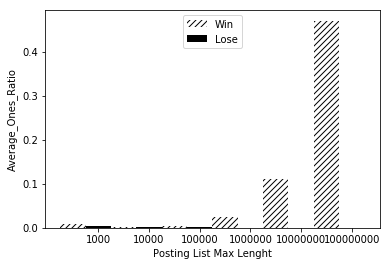

In [20]:
figure, ax = plt.subplots()
x = np.arange(6)

width = 0.5

ax.bar(x, average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win, width, color='w', hatch='////', label='Win')
ax.bar(x + width, average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose, width , color='black', label='Lose')

plt.xticks(x + 0.5, map(lambda x: str(x), logBins))

ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Average_Ones_Ratio')
ax.legend(loc=9)

print "Win => C_Li_wo1_EWAH_bitmap_Bytes < C_Li_Bytes"
print "Lose => C_Li_wo1_EWAH_bitmap_Bytes > C_Li_Bytes\n"
print "Posting List Max Lenght\t\t Ones_Ratio_Hybrid_Co_Win\t\t Ones_Ratio_Hybrid_Co_lose"
for i, (win, lose) in enumerate(zip(average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_win, average_Ones_Ratio_Hybrid_Co_bin_count_C_Li_wo1_EWAH_bitmap_Bytes_lose)):
    print "%i \t\t\t\t %.2f \t\t\t\t %.2f" % (logBins[i], win, lose)

In [21]:
# [0,10^3), [10^3,10^4), [10^4,10^5), [10^5,10^6), [10^6,10^7), [10^7,10^8) #
logBins = np.logspace(3.0, 8, num=6, dtype=np.uint64)
bin_absolute_proportion_indexData = np.zeros(6, dtype=np.float64)
average_SS_Ratio_Hybrid_Co_indexData = np.zeros(6, dtype=np.float64)
average_SS_Ratio_Li_indexData = np.zeros(6, dtype=np.float64)

average_Li_Bytes_indexData = np.zeros(6, dtype=np.float64)
average_C_Li_Bytes_indexData = np.zeros(6, dtype=np.float64)
average_C_Li_wo1_EWAH_bitmap_Bytes_indexData = np.zeros(6, dtype=np.float64)

Li_Bytes_indexData = np.zeros(6, dtype=np.uint)
C_Li_Bytes_indexData = np.zeros(6, dtype=np.uint64)
C_Li_wo1_EWAH_bitmap_Bytes_indexData = np.zeros(6, dtype=np.uint64)

# max(uint64) = 8446744073709551615

for row in indexData.values:
    Li_Len = row[1]
    SS_Ratio_Hybrid_Co = row[20]
    SS_Ratio_Li = row[17]
    Li_Bytes = row[12]
    C_Li_Bytes = row[14]
    C_Li_wo1_EWAH_bitmap_Bytes = row[23]
    index = bisect.bisect_right(logBins, Li_Len)
    bin_absolute_proportion_indexData[index] += 1
    average_SS_Ratio_Hybrid_Co_indexData[index] += SS_Ratio_Hybrid_Co
    average_SS_Ratio_Li_indexData[index] += SS_Ratio_Li
    average_Li_Bytes_indexData[index] += Li_Bytes
    average_C_Li_Bytes_indexData[index] += C_Li_Bytes
    average_C_Li_wo1_EWAH_bitmap_Bytes_indexData[index] += C_Li_wo1_EWAH_bitmap_Bytes
    Li_Bytes_indexData[index] += Li_Bytes
    C_Li_Bytes_indexData[index] += C_Li_Bytes
    C_Li_wo1_EWAH_bitmap_Bytes_indexData[index] += C_Li_wo1_EWAH_bitmap_Bytes
    
average_SS_Ratio_Hybrid_Co_indexData = average_SS_Ratio_Hybrid_Co_indexData / bin_absolute_proportion_indexData
average_SS_Ratio_Li_indexData = average_SS_Ratio_Li_indexData / bin_absolute_proportion_indexData
average_Li_Bytes_indexData = average_Li_Bytes_indexData / bin_absolute_proportion_indexData
average_C_Li_Bytes_indexData = average_C_Li_Bytes_indexData / bin_absolute_proportion_indexData
average_C_Li_wo1_EWAH_bitmap_Bytes_indexData = average_C_Li_wo1_EWAH_bitmap_Bytes_indexData / bin_absolute_proportion_indexData

print bin_absolute_proportion_indexData

#print average_SS_Ratio_Hybrid_Co_indexData
#print average_SS_Ratio_Li_indexData
#print average_Li_Bytes_indexData
#print average_C_Li_Bytes_indexData
#print average_C_Li_wo1_EWAH_bitmap_Bytes_indexData
#print Li_Bytes_indexData
#print C_Li_Bytes_indexData
#print C_Li_wo1_EWAH_bitmap_Bytes_indexData

[  4.50940000e+04   8.36700000e+04   2.40830000e+04   6.47600000e+03
   1.10000000e+03   6.00000000e+00]


Posting List Max Lenght		 SS_Ratio_Hybrid_Co		 SS_Ratio_Li
1000 				 0.42 				 0.42
10000 				 0.53 				 0.53
100000 				 0.64 				 0.64
1000000 				 0.75 				 0.74
10000000 				 0.84 				 0.82
100000000 				 0.94 				 0.90


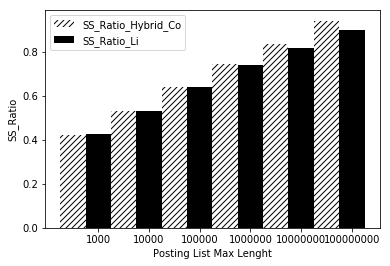

In [22]:
figure, ax = plt.subplots()
x = np.arange(6)

width = 0.5

ax.bar(x, average_SS_Ratio_Hybrid_Co_indexData, width, color='w', hatch='////', label='SS_Ratio_Hybrid_Co')
ax.bar(x + width, average_SS_Ratio_Li_indexData, width , color='black', label='SS_Ratio_Li')

plt.xticks(x + 0.5, map(lambda x: str(x), logBins))

ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('SS_Ratio')
ax.legend(loc=2)

print "Posting List Max Lenght\t\t SS_Ratio_Hybrid_Co\t\t SS_Ratio_Li"
for i, (a, b) in enumerate(zip(average_SS_Ratio_Hybrid_Co_indexData, average_SS_Ratio_Li_indexData)):
    print "%i \t\t\t\t %.2f \t\t\t\t %.2f" % (logBins[i], a, b)

PLML		 Li_Bytes		C_Li_Bytes 		C_Li_wo1_EWAH_bitmap_Bytes
1000 , 1954 , 1089 , 1090
10000 , 13666 , 6124 , 6121
100000 , 120662 , 41103 , 40921
1000000 , 1292065 , 312695 , 304107
10000000 , 8954601 , 1492081 , 1312309
100000000 , 44900007 , 4560431 , 2604184


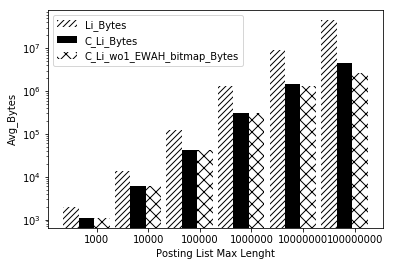

In [23]:
figure, ax = plt.subplots()
x = np.arange(6)

width = 0.30

ax.bar(x, average_Li_Bytes_indexData, width, color='w', hatch='////', label='Li_Bytes')
ax.bar(x + width, average_C_Li_Bytes_indexData, width , color='black', label='C_Li_Bytes')
ax.bar(x + width * 2, average_C_Li_wo1_EWAH_bitmap_Bytes_indexData, width , color='w',  hatch='xx', label='C_Li_wo1_EWAH_bitmap_Bytes')

plt.xticks(x + 0.5, map(lambda x: str(x), logBins))

ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Avg_Bytes')
ax.set_yscale('log')
ax.legend(loc=2)

print "PLML\t\t Li_Bytes\t\tC_Li_Bytes \t\tC_Li_wo1_EWAH_bitmap_Bytes"
for i, (a, b, c) in enumerate(zip(average_Li_Bytes_indexData, average_C_Li_Bytes_indexData, average_C_Li_wo1_EWAH_bitmap_Bytes_indexData)):
    print "%i , %i , %i , %i" % (logBins[i], a, b, c)

PLML		 Li_Bytes		C_Li_Bytes 		C_Li_wo1_EWAH_bitmap_Bytes
1000 , 88133884 , 49111828 , 49167966
10000 , 1143506456 , 512438584 , 512198206
100000 , 2905914760 , 989898688 , 985505794
1000000 , 8367417032 , 2025015588 , 1969397572
10000000 , 9850061204 , 1641289580 , 1443540640
100000000 , 269400044 , 27362588 , 15625106


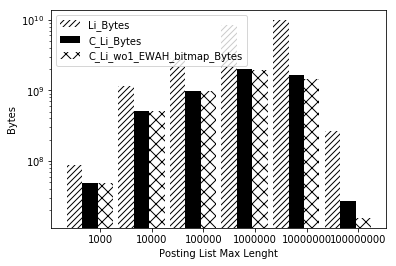

In [24]:
figure, ax = plt.subplots()
x = np.arange(6)

width = 0.30

ax.bar(x, Li_Bytes_indexData, width, color='w', hatch='////', label='Li_Bytes')
ax.bar(x + width, C_Li_Bytes_indexData, width , color='black', label='C_Li_Bytes')
ax.bar(x + width * 2, C_Li_wo1_EWAH_bitmap_Bytes_indexData, width , color='w',  hatch='xx', label='C_Li_wo1_EWAH_bitmap_Bytes')

plt.xticks(x + 0.5, map(lambda x: str(x), logBins))

ax.set_xlabel('Posting List Max Lenght')
ax.set_ylabel('Bytes')
ax.set_yscale('log')
ax.legend(loc=2)

print "PLML\t\t Li_Bytes\t\tC_Li_Bytes \t\tC_Li_wo1_EWAH_bitmap_Bytes"
for i, (a, b, c) in enumerate(zip(Li_Bytes_indexData, C_Li_Bytes_indexData, C_Li_wo1_EWAH_bitmap_Bytes_indexData)):
    print "%i , %i , %i , %i" % (logBins[i], a, b, c)

In [25]:
print "PLML\t\t # of Posting Lists per Bin"
for i, a in enumerate(bin_absolute_proportion_indexData):
    print "%i , %.2f" % (logBins[i], a)

PLML		 # of Posting Lists per Bin
1000 , 45094.00
10000 , 83670.00
100000 , 24083.00
1000000 , 6476.00
10000000 , 1100.00
100000000 , 6.00
